In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

# Training dataframe

In [4]:
train_df = pd.read_csv('../input/happy-whale-and-dolphin/train.csv')

In [5]:
train_df.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


# Information on species and individuals

The species names and how many of each there is the dataset.

In [6]:
train_df.species.groupby(train_df.species).count()

species
beluga                       7443
blue_whale                   4830
bottlenose_dolphin           9664
bottlenose_dolpin            1117
brydes_whale                  154
commersons_dolphin             90
common_dolphin                347
cuviers_beaked_whale          341
dusky_dolphin                3139
false_killer_whale           3326
fin_whale                    1324
frasiers_dolphin               14
globis                        116
gray_whale                   1123
humpback_whale               7392
kiler_whale                   962
killer_whale                 1493
long_finned_pilot_whale       238
melon_headed_whale           1689
minke_whale                  1608
pantropic_spotted_dolphin     145
pilot_whale                   262
pygmy_killer_whale             76
rough_toothed_dolphin          60
sei_whale                     428
short_finned_pilot_whale      367
southern_right_whale          866
spinner_dolphin              1700
spotted_dolphin               490
white_

In [7]:
num_species = train_df.species.groupby(train_df.species).count().nunique()
print('Number of species:', num_species)

Number of species: 30


As we can see above, there are some misspelled species names. Therefore, a replacement must be taken into account.
The issue was also identified by another Kaggler, [Aleksey Alekssev](https://www.kaggle.com/c/happy-whale-and-dolphin/discussion/305574).

In [8]:
# from Aleksey Alekssev
replacement_data = {'globis': 'short_finned_pilot_whale',
                    'pilot_whale': 'short_finned_pilot_whale',
                    'kiler_whale': 'killer_whale',
                    'bottlenose_dolpin': 'bottlenose_dolphin'}

train_df.species.replace(replacement_data, inplace=True)

train_df.species.groupby(train_df.species).count()

species
beluga                        7443
blue_whale                    4830
bottlenose_dolphin           10781
brydes_whale                   154
commersons_dolphin              90
common_dolphin                 347
cuviers_beaked_whale           341
dusky_dolphin                 3139
false_killer_whale            3326
fin_whale                     1324
frasiers_dolphin                14
gray_whale                    1123
humpback_whale                7392
killer_whale                  2455
long_finned_pilot_whale        238
melon_headed_whale            1689
minke_whale                   1608
pantropic_spotted_dolphin      145
pygmy_killer_whale              76
rough_toothed_dolphin           60
sei_whale                      428
short_finned_pilot_whale       745
southern_right_whale           866
spinner_dolphin               1700
spotted_dolphin                490
white_sided_dolphin            229
Name: species, dtype: int64

In [9]:
num_species = train_df.species.groupby(train_df.species).count().nunique()
print('Number of species:', num_species)

Number of species: 26


<AxesSubplot:>

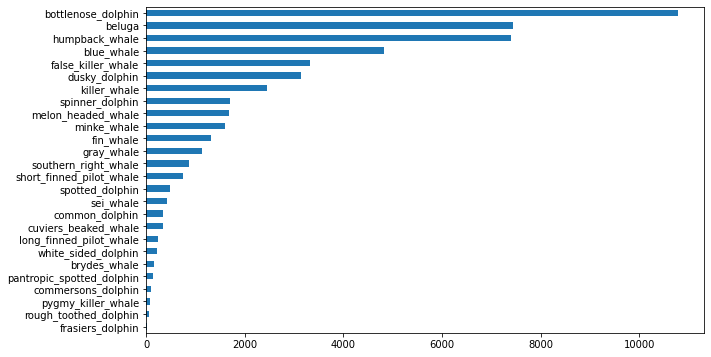

In [10]:
plt.figure(figsize=(10, 6))
train_df.species.value_counts().sort_values(ascending=True).plot(kind='barh')

In [11]:
train_df.individual_id.groupby(train_df.individual_id).count()

individual_id
0013f1f5f2f0    1
001618e0a31e    1
0018a0f40586    1
00191b9a2f6f    1
001a09e48b2d    4
               ..
fff35b58c591    1
fff591b41cce    4
fffb11ff4575    4
fffe15363b92    1
ffff6255f559    2
Name: individual_id, Length: 15587, dtype: int64